In [129]:
subscription_key = '6d1691bf159940679209d2d734d2e2e0'
assert subscription_key

In [130]:
faceDetect_api_url = 'https://northeurope.api.cognitive.microsoft.com/face/v1.0/detect'

In [141]:
image_url = 'https://how-old.net/Images/faces2/main004.jpg'

In [142]:
'''Find faces in an image'''
import requests
from IPython.display import HTML

headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
    
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

response = requests.post(faceDetect_api_url, params=params, headers=headers, json={"url": image_url})
faces = response.json()

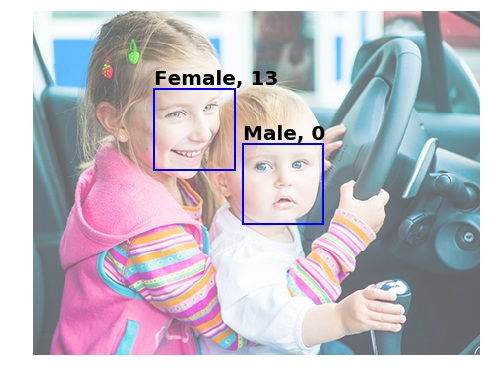

In [143]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

In [117]:
'''Create new FaceList'''
faceListName = '19012019facelist'
faceListCreate_api_url = 'https://northeurope.api.cognitive.microsoft.com/face/v1.0/facelists/' + faceListName

headers = {
    'Ocp-Apim-Subscription-Key': subscription_key,
}

params = {
    'faceListId': faceListName,
}

response = requests.put(faceListCreate_api_url, params=params, headers=headers, json={"name": faceListName})

print(response.json())

{'error': {'code': 'FaceListExists', 'message': "Face list '19012019facelist' already exists."}}


In [144]:
'''Allocate new faces to FaceList'''
faceListName = '19012019facelist'
newFaceToFaceList_api_url = 'https://northeurope.api.cognitive.microsoft.com/face/v1.0/facelists/'+faceListName+'/persistedFaces'

targetFace = 'targetFace='+str(left)+','+str(top)+','+str(width)+','+str(height)
print(targetFace)

headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
    
params = {
    'faceListId': faceListName,
    'targetFace': targetFace,
}

response = requests.post(newFaceToFaceList_api_url, params=params, headers=headers, json={"url": image_url})

print(response.json())

targetFace=213,135,81,81
{'error': {'code': 'BadArgument', 'message': 'Invalid argument targetFace.'}}


In [145]:
'''See what's in the FaceList'''
getFaceList_api_url = 'https://northeurope.api.cognitive.microsoft.com/face/v1.0/facelists/'+faceListName
headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
    
params = {
    'faceListId': faceListName,
}

response = requests.get(getFaceList_api_url, params=params, headers=headers)

print(response.json())

{'persistedFaces': [{'persistedFaceId': 'c6f9594b-0ad5-46d0-a024-a3bb06230149', 'userData': None}], 'faceListId': '19012019facelist', 'name': '19012019facelist', 'userData': None}


In [ ]:
'''Face similarity'''
from IPython.display import HTML

faceSimilarity_api_url = 'https://northeurope.api.cognitive.microsoft.com/face/v1.0/findsimilars'

headers = { 'Ocp-Apim-Subscription-Key': subscription_key }

response = requests.post(faceSimilarity_api_url, headers=headers, json={'faceId': faceId, 'faceListId': faceListId, 'mode': 'matchFace'})
similarfaces = response.json() # Returns persistedFaceId and confidence for each response

In [147]:
print(newFaceToFaceList_api_url)

https://northeurope.api.cognitive.microsoft.com/face/v1.0/facelists/19012019facelist/persistedFaces


In [134]:
for face in faces:
    fr = face["faceRectangle"]
    
    origin = (fr["left"], fr["top"])
    width, height = fr["width"], fr["height"]
    
    left = origin[0]; right = origin[0]+width
    top = origin[1]; bottom = origin[1]+height
    crop_rectangle = (left, top, right, bottom)
    cropped_im = image.crop(crop_rectangle)
    cropped_im.show()

In [54]:
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    print(fr)
    print(fa)
    print(face["faceId"])

{'top': 147, 'left': 222, 'width': 98, 'height': 98}
{'smile': 0.992, 'headPose': {'pitch': 0.0, 'roll': -4.9, 'yaw': -6.9}, 'gender': 'male', 'age': 35.0, 'facialHair': {'moustache': 0.4, 'beard': 0.1, 'sideburns': 0.1}, 'glasses': 'NoGlasses', 'emotion': {'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.992, 'neutral': 0.007, 'sadness': 0.0, 'surprise': 0.0}, 'blur': {'blurLevel': 'low', 'value': 0.25}, 'exposure': {'exposureLevel': 'goodExposure', 'value': 0.7}, 'noise': {'noiseLevel': 'low', 'value': 0.0}, 'makeup': {'eyeMakeup': False, 'lipMakeup': False}, 'accessories': [], 'occlusion': {'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}, 'hair': {'bald': 0.01, 'invisible': False, 'hairColor': [{'color': 'brown', 'confidence': 0.96}, {'color': 'black', 'confidence': 0.93}, {'color': 'gray', 'confidence': 0.27}, {'color': 'blond', 'confidence': 0.25}, {'color': 'other', 'confidence': 0.16}, {'color': 'red', 'confidence': 0.1}]}}
79b6

In [7]:
def annotate_image(image_url):
    response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
    faces = response.json()

    image_file = BytesIO(requests.get(image_url).content)
    image = Image.open(image_file)

    plt.figure(figsize=(8,8))
    ax = plt.imshow(image, alpha=0.6)
    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], \
                              fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), \
                 fontsize=20, weight="bold", va="bottom")
    plt.axis("off")

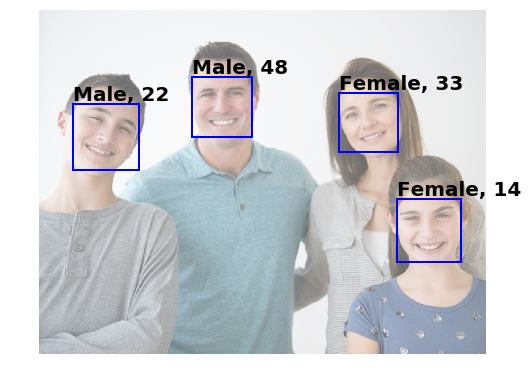

In [8]:
annotate_image("https://how-old.net/Images/faces2/main001.jpg")